# Applying Machine Learning and Deep Learning to identify home appliances consuming excess power

## Copyright (c) 2018, Faststream Technologies
## Author: Sudhanva Narayana

In [1]:
# Home Appliances Data
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
# Import Dataset
df = pd.read_csv('../../data/final_output.csv')

In [3]:
df.head()

,device,room,weather_type,date,from_time,to_time,time,no_of_people,time_stayed_mins,power,message,action
0,AC,100,hot,01-01-2018,00:00:00,01:00:00,midnight,3,21,1528.898438,Moving 10 people from room 119 to room 105 sav...,Turn off AC in room 119
1,AC,100,very cold,01-01-2018,00:00:00,01:00:00,midnight,10,5,1512.648438,Moving 10 people from room 119 to room 105 sav...,Turn off AC in room 119
2,AC,100,cold,01-01-2018,02:00:00,03:00:00,midnight,4,22,1521.007813,Moving 15 people from room 102 to room 105 sav...,Turn off AC in room 102
3,AC,100,cold,01-01-2018,03:00:00,04:00:00,midnight,3,5,1499.714844,Moving 7 people from room 110 to room 100 save...,Turn off AC in room 110
4,AC,100,very cold,01-01-2018,05:00:00,06:00:00,early morning,2,35,1507.480469,Moving 2 people from room 100 to room 110 save...,Turn off AC in room 100


In [4]:
# Total Power Consumption on all devices
df_total_power = df.groupby('device').sum()['power']

### -----------Total power consumption of all devices------------

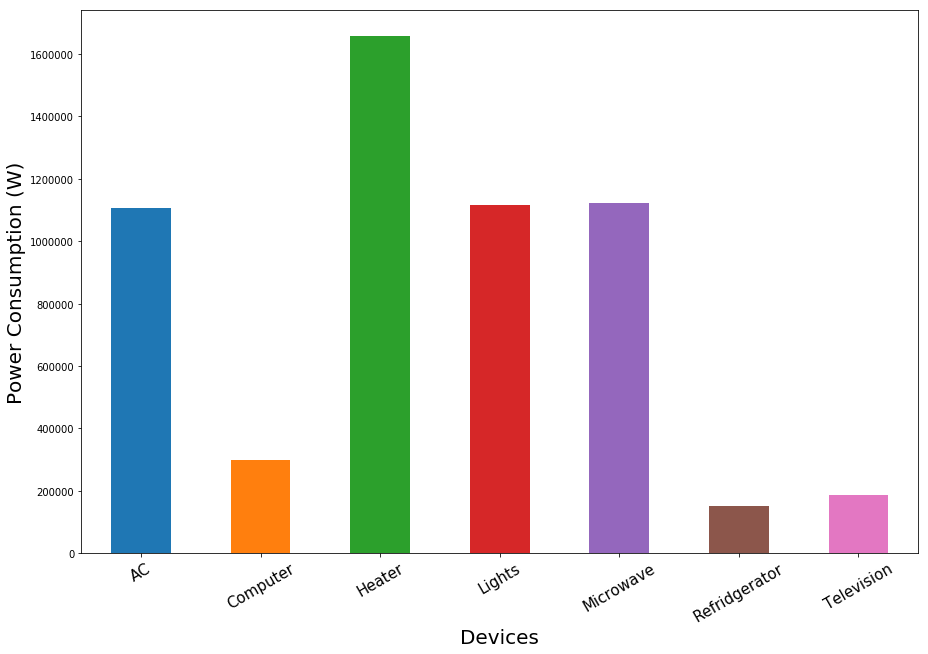

In [5]:
plt.figure(figsize=(15,10))
df_total_power.plot(kind='bar')
plt.xticks(np.arange(len(df_total_power.index)), df_total_power.index, rotation=30, fontsize=15)
plt.xlabel('Devices', fontsize=20)
plt.ylabel('Power Consumption (W)', fontsize=20)
plt.show()

In [6]:
date_time_group = df.groupby(['date','from_time']).sum()['power'].reset_index()

In [7]:
date_time_group.to_csv('../../data/final_output_group.csv', index=False)